In [98]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
%matplotlib inline
import itertools

import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.utils import resample
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')


In [55]:
dfWeather=pd.read_csv("wheatherNEW2.csv")
dfWeather


,Unnamed: 0,temp_c,wind_mph,pressure_in,humidity,feelslike_c,dewpoint_c,chance_of_rain,city,year,month,day,hour,season
0,0,11.2,6.6,30.5,64,10.1,4.5,1,Jerusalem,2020,1,1,13:00,winter
1,0,16.1,11.0,30.5,65,16.1,9.4,21,Tel Aviv,2020,1,1,13:00,winter
2,0,15.6,10.6,30.5,69,15.5,9.9,21,Haifa,2020,1,1,13:00,winter
3,0,15.8,10.5,30.5,64,15.7,8.9,1,Holon,2020,1,1,13:00,winter
4,0,15.8,10.5,30.5,64,15.7,8.9,1,Bat Yam,2020,1,1,13:00,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402162,0,16.3,21.9,30.2,72,15.5,11.1,1,rehovot,2010,2,28,07:00,winter
402163,0,15.3,20.9,30.2,79,14.5,11.7,3,hadera,2010,2,28,07:00,winter
402164,0,16.2,22.6,30.2,74,15.5,11.5,80,herzliya,2010,2,28,07:00,winter
402165,0,16.0,21.0,30.2,74,15.2,11.4,80,Hod HaSharon,2010,2,28,07:00,winter


In [56]:
dfWeather.drop(["Unnamed: 0"], axis=1, inplace=True)


In [57]:
dfWeather

,temp_c,wind_mph,pressure_in,humidity,feelslike_c,dewpoint_c,chance_of_rain,city,year,month,day,hour,season
0,11.2,6.6,30.5,64,10.1,4.5,1,Jerusalem,2020,1,1,13:00,winter
1,16.1,11.0,30.5,65,16.1,9.4,21,Tel Aviv,2020,1,1,13:00,winter
2,15.6,10.6,30.5,69,15.5,9.9,21,Haifa,2020,1,1,13:00,winter
3,15.8,10.5,30.5,64,15.7,8.9,1,Holon,2020,1,1,13:00,winter
4,15.8,10.5,30.5,64,15.7,8.9,1,Bat Yam,2020,1,1,13:00,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402162,16.3,21.9,30.2,72,15.5,11.1,1,rehovot,2010,2,28,07:00,winter
402163,15.3,20.9,30.2,79,14.5,11.7,3,hadera,2010,2,28,07:00,winter
402164,16.2,22.6,30.2,74,15.5,11.5,80,herzliya,2010,2,28,07:00,winter
402165,16.0,21.0,30.2,74,15.2,11.4,80,Hod HaSharon,2010,2,28,07:00,winter


<AxesSubplot:ylabel='season'>

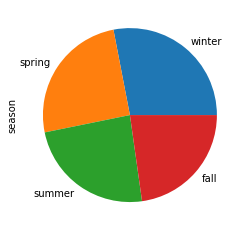

In [58]:
dfWeather['season'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='hour'>

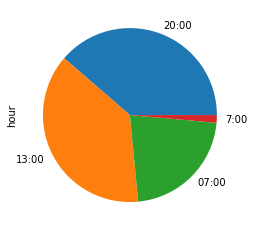

In [59]:
dfWeather['hour'].value_counts().plot(kind='pie')

In [60]:
#היו חלק מהשורות שמוגדר בשעה 7:00 במקום 07:00
dfWeather.loc[dfWeather['hour']=='7:00']

,temp_c,wind_mph,pressure_in,humidity,feelslike_c,dewpoint_c,chance_of_rain,city,year,month,day,hour,season
130176,9.0,1.5,30.6,83,9.0,6.1,1,Jerusalem,2020,1,1,7:00,winter
130177,13.8,8.5,30.6,71,12.9,8.6,21,Tel Aviv,2020,1,1,7:00,winter
130178,12.2,7.7,30.6,79,11.1,8.7,80,Haifa,2020,1,1,7:00,winter
130179,13.2,7.2,30.6,72,12.4,8.4,1,Holon,2020,1,1,7:00,winter
130180,13.2,7.2,30.6,72,12.4,8.4,1,Bat Yam,2020,1,1,7:00,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135862,24.7,15.4,30.2,39,25.4,9.8,1,rehovot,2010,3,14,7:00,winter
135863,24.7,12.8,30.2,39,25.6,9.9,1,hadera,2010,3,14,7:00,winter
135864,24.1,14.9,30.2,42,25.2,10.3,1,herzliya,2010,3,14,7:00,winter
135865,25.0,14.7,30.2,38,25.6,9.5,1,Hod HaSharon,2010,3,14,7:00,winter


In [61]:
#שינוי מ7:00 ל-07:00
dfWeather.hour[dfWeather.hour=='7:00']='07:00'

<ipython-input-61-64922f27cea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWeather.hour[dfWeather.hour=='7:00']='07:00'


In [62]:
#בדיקה
dfWeather.loc[dfWeather['hour']=='07:00']

,temp_c,wind_mph,pressure_in,humidity,feelslike_c,dewpoint_c,chance_of_rain,city,year,month,day,hour,season
130176,9.0,1.5,30.6,83,9.0,6.1,1,Jerusalem,2020,1,1,07:00,winter
130177,13.8,8.5,30.6,71,12.9,8.6,21,Tel Aviv,2020,1,1,07:00,winter
130178,12.2,7.7,30.6,79,11.1,8.7,80,Haifa,2020,1,1,07:00,winter
130179,13.2,7.2,30.6,72,12.4,8.4,1,Holon,2020,1,1,07:00,winter
130180,13.2,7.2,30.6,72,12.4,8.4,1,Bat Yam,2020,1,1,07:00,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402162,16.3,21.9,30.2,72,15.5,11.1,1,rehovot,2010,2,28,07:00,winter
402163,15.3,20.9,30.2,79,14.5,11.7,3,hadera,2010,2,28,07:00,winter
402164,16.2,22.6,30.2,74,15.5,11.5,80,herzliya,2010,2,28,07:00,winter
402165,16.0,21.0,30.2,74,15.2,11.4,80,Hod HaSharon,2010,2,28,07:00,winter


In [66]:
dfDates['hour']=""

In [67]:
dfDates

,year,month,day,hour
0,2020,1,1,
1,2020,1,1,
2,2020,1,1,
3,2020,1,1,
4,2020,1,1,
...,...,...,...,...
402162,2010,2,28,
402163,2010,2,28,
402164,2010,2,28,
402165,2010,2,28,


In [70]:
#מכניסים לדטהפריים רק את הנתונים של התאריך
dfDates = dfWeather.drop(columns=['temp_c', 'wind_mph' , 'pressure_in' , 'humidity' , 
                                  'feelslike_c' , 'dewpoint_c' , 'chance_of_rain' , 'city' , 'season'])
dfDates = dfDates[['year' , 'month' , 'day', 'hour' ]]


count=0
dfH = dfDates['hour']

for i in dfH:
    dfDates['hour'][count] = i[0:2]
    count=count+1

<ipython-input-70-d537b55941d5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDates['hour'][count] = i[0:2]


In [72]:
dfDates['hour'].unique()

array(['13', '20', '07'], dtype=object)

In [88]:
dfDates.to_csv("dfDates.csv")

In [73]:
dfWeather['fullDate'] = pd.to_datetime(dfDates , format='%y-%m-%d-%H')

In [75]:
dfWeather = dfWeather[['fullDate' ,'year', 'month', 'day', 'hour',
                       'temp_c', 'feelslike_c', 'wind_mph', 'humidity', 'pressure_in', 
                       'dewpoint_c', 'chance_of_rain',  'season', 'city']]
dfWeather

,fullDate,year,month,day,hour,temp_c,feelslike_c,wind_mph,humidity,pressure_in,dewpoint_c,chance_of_rain,season,city
0,2020-01-01 13:00:00,2020,1,1,13:00,11.2,10.1,6.6,64,30.5,4.5,1,winter,Jerusalem
1,2020-01-01 13:00:00,2020,1,1,13:00,16.1,16.1,11.0,65,30.5,9.4,21,winter,Tel Aviv
2,2020-01-01 13:00:00,2020,1,1,13:00,15.6,15.5,10.6,69,30.5,9.9,21,winter,Haifa
3,2020-01-01 13:00:00,2020,1,1,13:00,15.8,15.7,10.5,64,30.5,8.9,1,winter,Holon
4,2020-01-01 13:00:00,2020,1,1,13:00,15.8,15.7,10.5,64,30.5,8.9,1,winter,Bat Yam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402162,2010-02-28 07:00:00,2010,2,28,07:00,16.3,15.5,21.9,72,30.2,11.1,1,winter,rehovot
402163,2010-02-28 07:00:00,2010,2,28,07:00,15.3,14.5,20.9,79,30.2,11.7,3,winter,hadera
402164,2010-02-28 07:00:00,2010,2,28,07:00,16.2,15.5,22.6,74,30.2,11.5,80,winter,herzliya
402165,2010-02-28 07:00:00,2010,2,28,07:00,16.0,15.2,21.0,74,30.2,11.4,80,winter,Hod HaSharon


In [77]:
#נבדוק כמה כפילויות קיימות
dfWeather.duplicated(subset=['year','month','day','hour','city']).sum()

167041

In [78]:
dfWeather.loc[dfWeather.duplicated(), :]

,fullDate,year,month,day,hour,temp_c,feelslike_c,wind_mph,humidity,pressure_in,dewpoint_c,chance_of_rain,season,city
16,2020-01-01 13:00:00,2020,1,1,13:00,15.8,15.7,10.5,64,30.5,8.9,1,winter,rehovot
37,2020-01-02 13:00:00,2020,1,2,13:00,16.1,16.0,5.9,56,30.5,7.2,1,winter,rehovot
58,2020-01-03 13:00:00,2020,1,3,13:00,13.5,10.9,21.3,60,30.5,5.7,1,winter,rehovot
79,2020-01-04 13:00:00,2020,1,4,13:00,14.0,12.7,16.0,71,30.5,8.7,2,winter,rehovot
100,2020-01-05 13:00:00,2020,1,5,13:00,13.2,10.5,20.2,77,30.5,9.2,3,winter,rehovot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402162,2010-02-28 07:00:00,2010,2,28,07:00,16.3,15.5,21.9,72,30.2,11.1,1,winter,rehovot
402163,2010-02-28 07:00:00,2010,2,28,07:00,15.3,14.5,20.9,79,30.2,11.7,3,winter,hadera
402164,2010-02-28 07:00:00,2010,2,28,07:00,16.2,15.5,22.6,74,30.2,11.5,80,winter,herzliya
402165,2010-02-28 07:00:00,2010,2,28,07:00,16.0,15.2,21.0,74,30.2,11.4,80,winter,Hod HaSharon


In [79]:
#מחיקת השורות הכפולות
dfWeather = dfWeather.drop_duplicates()

In [80]:
#בדיקה שאכן נמחקו
dfWeather.duplicated().sum()

0

In [83]:
#בדיקה שלא קיימים נתונים חסרים
dfWeather.isnull().sum()

fullDate          0
year              0
month             0
day               0
hour              0
temp_c            0
feelslike_c       0
wind_mph          0
humidity          0
pressure_in       0
dewpoint_c        0
chance_of_rain    0
season            0
city              0
dtype: int64

In [81]:
dfWeather['fullDate'].min() , dfWeather['fullDate'].max()

(Timestamp('2010-01-01 07:00:00'), Timestamp('2020-12-31 20:00:00'))

In [82]:
#מיון לפי תאריך ושעה
dfWeather = dfWeather.sort_values('fullDate')

In [84]:
#הגדרת התאריך והשעה כאינדקס
dfWeather = dfWeather.set_index('fullDate')

In [86]:
#שמירת הנתונים
dfWeather.to_csv("WeatherDF.csv")

In [90]:
df=dfWeather.copy()

Our current datetime data can be tricky to work with, therefore, we will use the averages daily values for that month instead, and we are using the start of each month as the timestamp:


In [91]:
y = df['temp_c'].resample('MS').mean()

In [92]:
print(y)

fullDate
2010-01-01    16.710108
2010-02-01    16.660179
2010-03-01    18.696183
2010-04-01    20.140000
2010-05-01    23.490269
                ...    
2020-08-01    28.393871
2020-09-01    28.664056
2020-10-01    25.878710
2020-11-01    20.503444
2020-12-01    17.889032
Freq: MS, Name: temp_c, Length: 132, dtype: float64


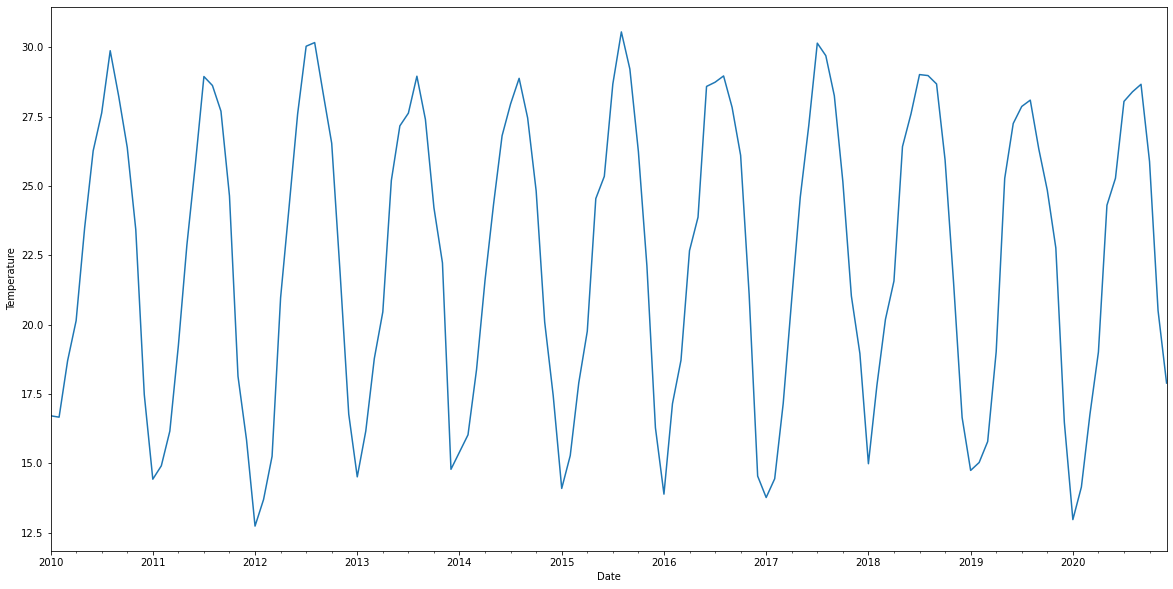

In [93]:
y.plot(figsize=(20, 10))
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

ARIMA: We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average. ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:


In [96]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.


In [99]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,  order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            print("Err")
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1195.7478431837785
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:963.3538060335371
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:462.9130628335086
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:339.210560264627
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:468.6779652327767
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:395.31560608715904
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:378.3016950483595
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:349.67342446591556
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1017.8687869944359
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:814.9859945223754
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:449.2663605222026
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:327.1377971020593
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:472.0177222335954
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:379.73582814438373
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:370.45023957178256
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:333.99138062618493
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:656.52754235729
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:545.4859490420721
ARIMA(

Fitting the ARIMA model

In [100]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3580      0.110      3.264      0.001       0.143       0.573
ma.L1         -0.9734      0.047    -20.850      0.000      -1.065      -0.882
ar.S.L12      -0.5426      0.082     -6.642      0.000      -0.703      -0.382
sigma2         1.6786      0.254      6.608      0.000       1.181       2.176


To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2020–07–01 to the end of the data.


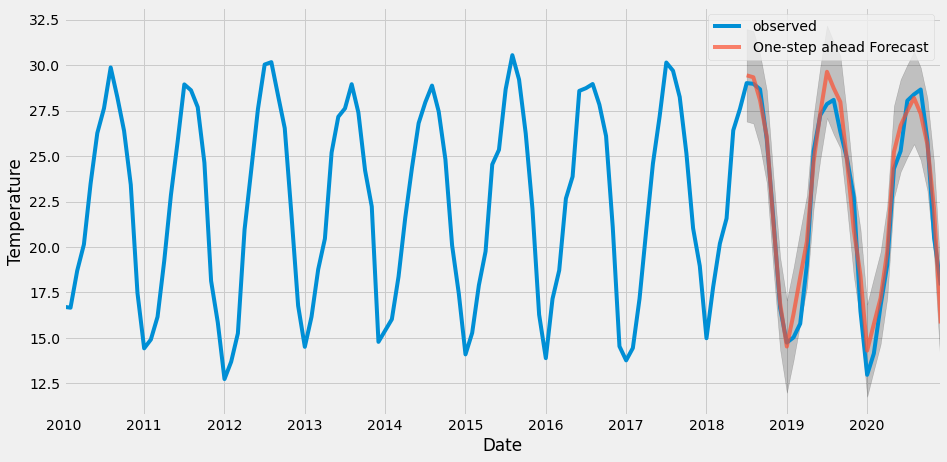

In [101]:
pred = results.get_prediction(start=pd.to_datetime('2018-07-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()

In [102]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-07-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.51


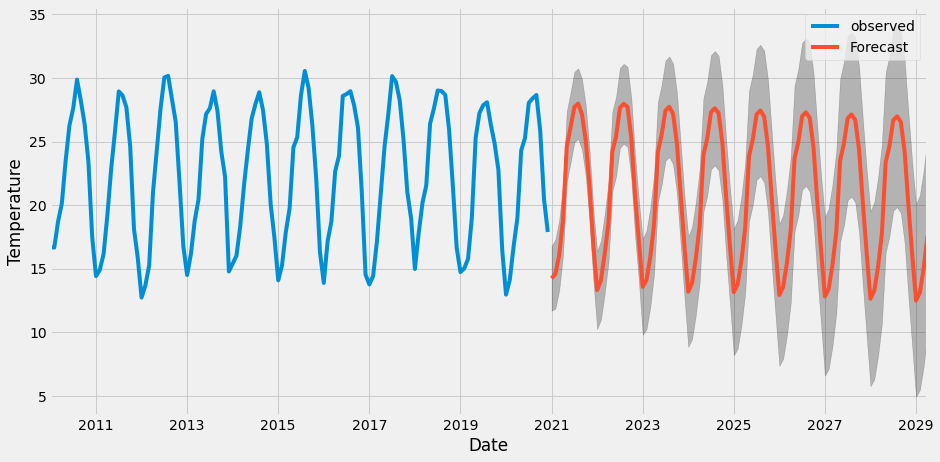

In [103]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()

END OF ARIMA

In [108]:
df.describe(include='all')

,year,month,day,hour,temp_c,feelslike_c,wind_mph,humidity,pressure_in,dewpoint_c,chance_of_rain,season,city
count,235126.000000,235126.000000,235126.000000,235126,235126.000000,235126.000000,235126.000000,235126.000000,235126.000000,235126.000000,235126.000000,235126,235126
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,20
top,NaN,NaN,NaN,13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,spring,netanya
freq,NaN,NaN,NaN,80300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60160,11757
mean,2014.901814,6.495428,15.708765,NaN,22.388371,23.032428,7.943638,57.124695,30.405225,12.722512,4.943154,NaN,NaN
std,3.137373,3.457925,8.794398,NaN,6.248127,7.231829,4.235311,15.931156,0.152179,6.279831,16.952198,NaN,NaN
min,2010.000000,1.000000,1.000000,NaN,0.200000,-3.300000,0.200000,4.000000,29.900000,-26.100000,0.000000,NaN,NaN
25%,2012.000000,3.000000,8.000000,NaN,17.300000,17.300000,4.800000,47.000000,30.300000,8.500000,0.000000,NaN,NaN
50%,2015.000000,7.000000,16.000000,NaN,22.900000,24.600000,7.200000,58.000000,30.400000,12.500000,0.000000,NaN,NaN
75%,2018.000000,10.000000,23.000000,NaN,27.500000,28.700000,10.500000,69.000000,30.500000,18.000000,1.000000,NaN,NaN


In [104]:
Q1 = np.percentile(df["humidity"], 25)
Q3 = np.percentile(df["humidity"], 75)
IQR = Q3 - Q1

humidity_outlier_rows = df[(df["humidity"] < Q1 - 1.5*IQR) | (df["humidity"] > Q3 + 1.5*IQR )].index

In [105]:
len(humidity_outlier_rows)

825

In [106]:
z_score = (df["humidity"] - df["humidity"].mean()) / df["humidity"].std()
z_score.describe()

count    2.351260e+05
mean     1.509431e-15
std      1.000000e+00
min     -3.334642e+00
25%     -6.355279e-01
50%      5.494298e-02
75%      7.454139e-01
max      2.691286e+00
Name: humidity, dtype: float64